In [0]:
from fastai import *
from fastai.vision import *

In [2]:
help(untar_data)     #Use help() of doc() to get ll the details related to all the functions/classes in fastai

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [3]:
path = untar_data(URLs.PETS)

In [4]:
imgP, labP = path.ls()
imgP, labP

(PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'))

In [5]:
fnames = get_image_files(imgP)
fnames[0:2]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_52.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_105.jpg')]

In [0]:
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(imgP, fnames, pat, ds_tfms=get_transforms(), size = 224)   #DataBunch is the data object for fastai.

In [7]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
newfoundland,saint_bernard,samoyed,american_pit_bull_terrier,Ragdoll
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
shiba_inu,Bombay,german_shorthaired,english_cocker_spaniel,Ragdoll
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

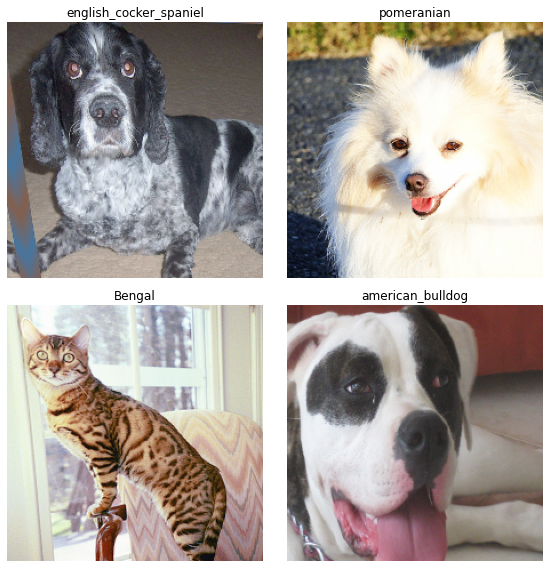

In [8]:
data.show_batch(rows = 2)

In [9]:
print(data.classes); len(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


37

In [0]:
#RESNET34

In [11]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [12]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.497634,0.354066,0.111637,01:24
1,0.687039,0.327182,0.100812,01:23
2,0.433878,0.233189,0.075101,01:22
3,0.297614,0.218151,0.070365,01:21
4,0.228683,0.219555,0.070365,01:21


In [0]:
learn.save('stage-1')  

In [16]:
interpret = ClassificationInterpretation.from_learner(learn)      #To interpret the results of the model (learn)

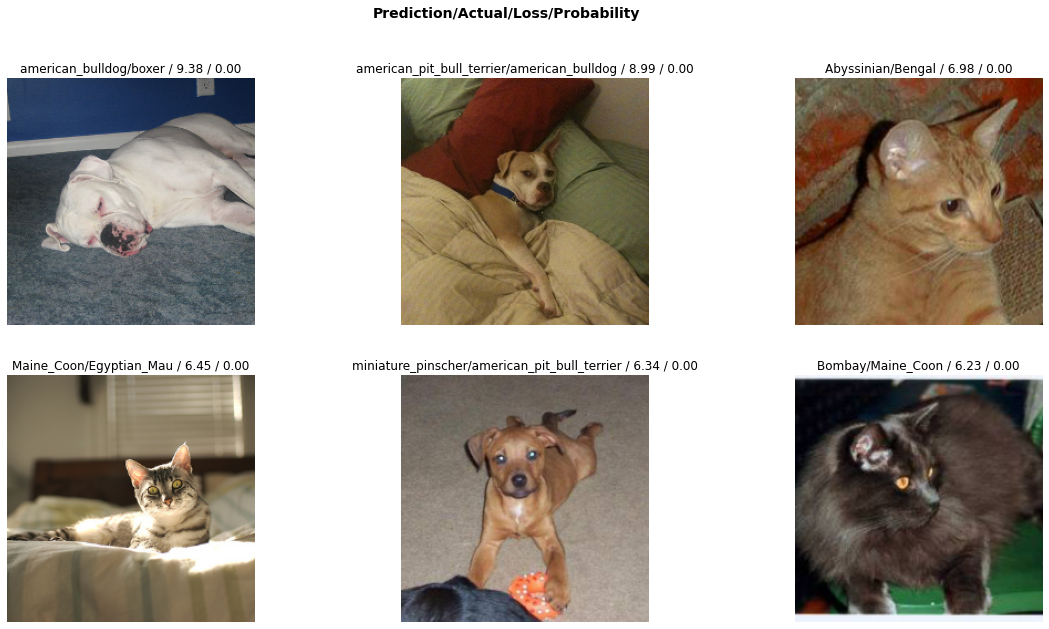

In [25]:
interpret.plot_top_losses(6, figsize = (20, 10))          #Plots top losses, the classes that were most confused for another

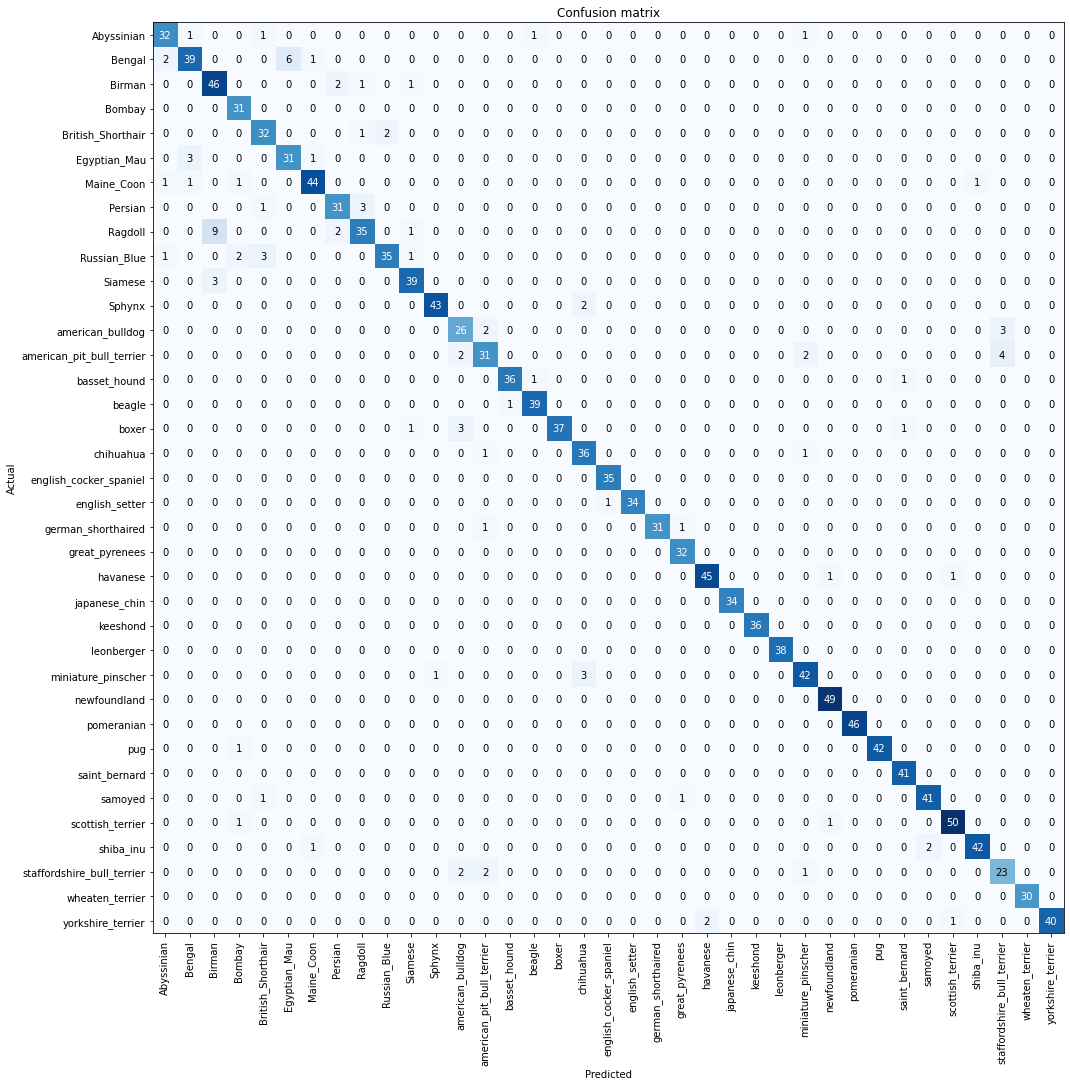

In [30]:
interpret.plot_confusion_matrix(figsize=(15,15))

In [0]:
#Important functions, doc() to read through them
#learn.unfreeze()
#learn.load()